In [1]:
import pandas as pd

data = pd.read_csv('laptopPrice.csv')
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [2]:
print("\nLaptop Price Dataset - Missing Values:")
print(data.isnull().sum())



Laptop Price Dataset - Missing Values:
brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64


In [3]:
print("\nLaptop Price Dataset - Data Types:")
print(data.dtypes)


Laptop Price Dataset - Data Types:
brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
os_bit               object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object


label encoding for categorical features

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in data.select_dtypes(include=['object']).columns:
  data[col] = le.fit_transform(data[col])


In [8]:
print("\nProcessed Laptop Dataset Head:")
print(data.head())


Processed Laptop Dataset Head:
   brand  processor_brand  processor_name  processor_gnrtn  ram_gb  ram_type  \
0      1                1               1                0       2         1   
1      5                1               1                0       2         1   
2      5                1               1                0       2         1   
3      1                1               2                0       3         1   
4      1                1               0                7       2         1   

   ssd  hdd  os  os_bit  graphic_card_gb  weight  warranty  Touchscreen  \
0    0    1   2       1                0       0         3            0   
1    0    1   2       1                0       0         3            0   
2    0    1   2       1                0       0         3            0   
3    6    0   2       0                1       0         3            0   
4    0    3   2       1                0       0         3            0   

   msoffice  Price  rating  Number o

In [12]:
X = data.drop('Price', axis=1)
y = data['Price']

now im splitting the data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


feature scaling

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_scaled = scaler.fit_transform(X)

Model Building and Evaluation

now im gonna train gradient boosting regressor

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

prediction and evaluation

In [16]:

y_pred_laptop_gb = gb_regressor.predict(X_test) # Use scaled test data
print("\nGradient Boosting Regressor - Laptop Price Prediction:")
print("Laptop Price Prediction MSE:", mean_squared_error(y_test, y_pred_laptop_gb))
print("Laptop Price Prediction R2 Score:", r2_score(y_test, y_pred_laptop_gb))



Gradient Boosting Regressor - Laptop Price Prediction:
Laptop Price Prediction MSE: 733238706.2498115
Laptop Price Prediction R2 Score: 0.6237499502629062


In [17]:
from sklearn.ensemble import AdaBoostRegressor

# Train AdaBoost Regressor for Laptop Price
ada_reg_laptop = AdaBoostRegressor(n_estimators=100, learning_rate=0.5, random_state=42) # Adjusted learning_rate
ada_reg_laptop.fit(X_train, y_train)
# Predict and Evaluate for Laptop Price
y_pred_laptop_ada = ada_reg_laptop.predict(X_test) # Use scaled test data
print("\nAdaBoost Regressor - Laptop Price Prediction:")
print("Laptop Price Prediction MSE:", mean_squared_error(y_test, y_pred_laptop_ada))
print("Laptop Price Prediction R2 Score:", r2_score(y_test, y_pred_laptop_ada))



AdaBoost Regressor - Laptop Price Prediction:
Laptop Price Prediction MSE: 1109597479.348113
Laptop Price Prediction R2 Score: 0.43062729335698013


In [19]:
import xgboost as xgb

xgb_reg_laptop = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_reg_laptop.fit(X_train, y_train)

# Predict and Evaluate for Laptop Price
y_pred_laptop_xgb = xgb_reg_laptop.predict(X_test) # Use scaled test data
print("\nXGBoost Regressor - Laptop Price Prediction:")
print("Laptop Price Prediction MSE:", mean_squared_error(y_test, y_pred_laptop_xgb))
print("Laptop Price Prediction R2 Score:", r2_score(y_test, y_pred_laptop_xgb))


XGBoost Regressor - Laptop Price Prediction:
Laptop Price Prediction MSE: 612027904.0
Laptop Price Prediction R2 Score: 0.6859473586082458


In [20]:
import lightgbm as lgb

# Train LightGBM Regressor for Laptop Price
lgbm_reg_laptop = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm_reg_laptop.fit(X_train, y_train) # Use scaled data

# Predict and Evaluate for Laptop Price
y_pred_laptop_lgbm = lgbm_reg_laptop.predict(X_test) # Use scaled test data
print("\nLightGBM Regressor - Laptop Price Prediction:")
print("Laptop Price Prediction MSE:", mean_squared_error(y_test, y_pred_laptop_lgbm))
print("Laptop Price Prediction R2 Score:", r2_score(y_test, y_pred_laptop_lgbm))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 658, number of used features: 18
[LightGBM] [Info] Start training from score 76531.638298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [21]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Define base regressors
estimators_reg_laptop = [
    ('gb', GradientBoostingRegressor(n_estimators=50, random_state=42)),   # Reduced estimators for stacking
    ('ada', AdaBoostRegressor(n_estimators=50, random_state=42)),          # Reduced estimators for stacking
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),       # Reduced estimators for stacking
    ('lgbm', lgb.LGBMRegressor(n_estimators=50, random_state=42)),         # Reduced estimators for stacking
    ('xgb', xgb.XGBRegressor(n_estimators=50, random_state=42))            # Reduced estimators for stacking
]

# Define meta-regressor
meta_regressor_laptop = LinearRegression() # Simple linear regression as meta-regressor

# Initialize Stacking Regressor
stack_reg_laptop = StackingRegressor(estimators=estimators_reg_laptop, final_estimator=meta_regressor_laptop)
stack_reg_laptop.fit(X_train, y_train) # Use scaled training data

# Predict and Evaluate for Laptop Price
y_pred_laptop_stack = stack_reg_laptop.predict(X_test) # Use scaled test data
print("\nStacking Regressor - Laptop Price Prediction:")
print("Laptop Price Prediction MSE:", mean_squared_error(y_test, y_pred_laptop_stack))
print("Laptop Price Prediction R2 Score:", r2_score(y_test, y_pred_laptop_stack))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 658, number of used features: 18
[LightGBM] [Info] Start training from score 76531.638298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 526, number of used features: 18
[LightGBM] [Info] Start training from score 77503.889734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


visualizations

In [22]:
models = ['Gradient Boosting', 'AdaBoost', 'XGBoost', 'LightGBM', 'Stacking']
predictions = [y_pred_laptop_gb, y_pred_laptop_ada, y_pred_laptop_xgb, y_pred_laptop_lgbm, y_pred_laptop_stack]

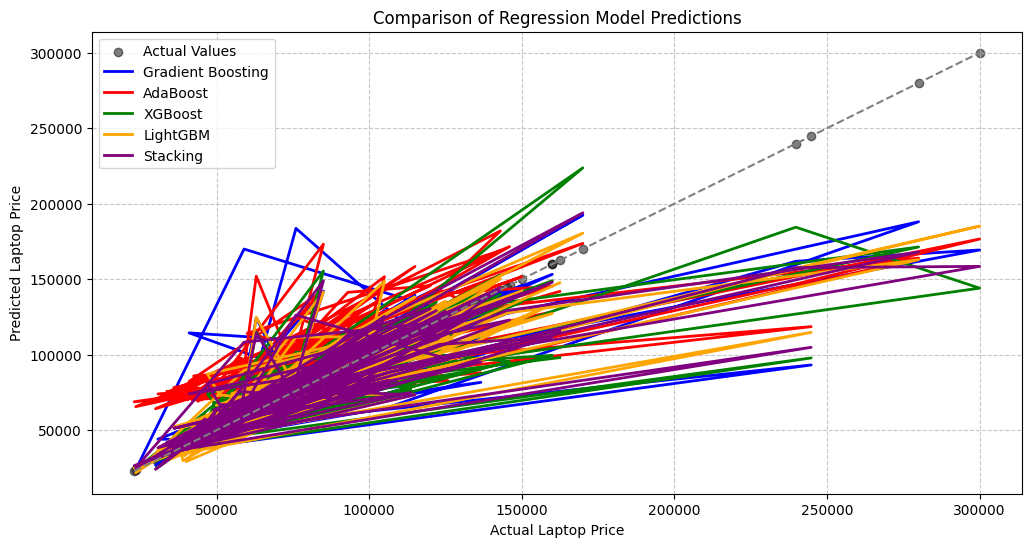

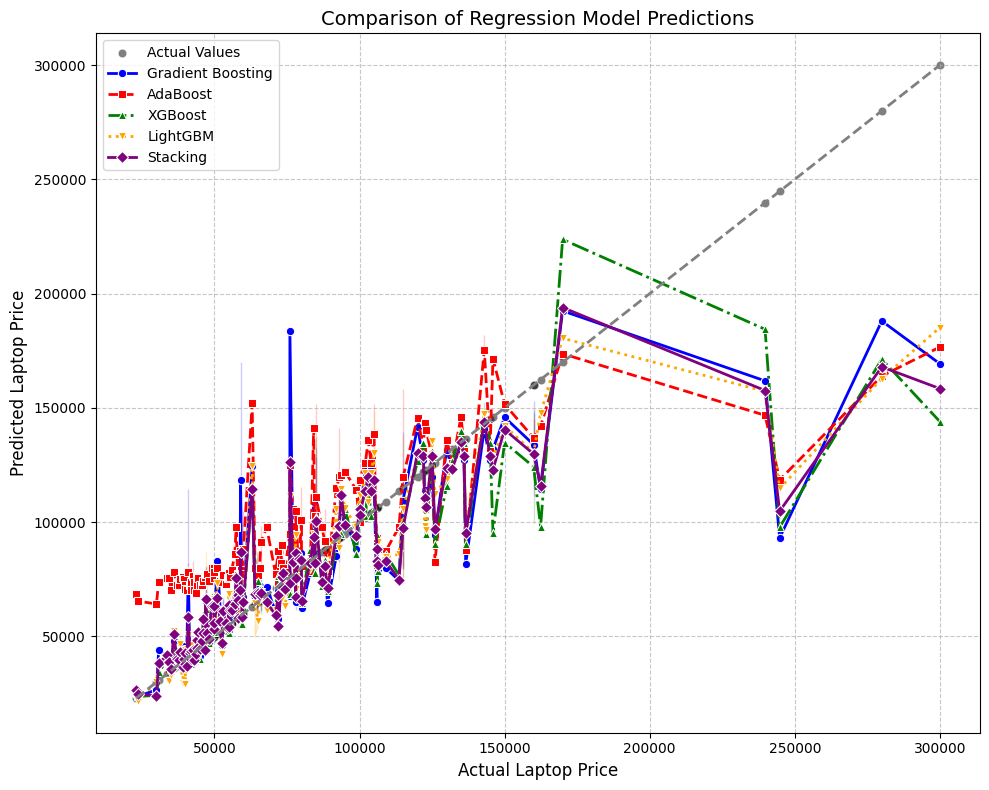

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot for actual vs predicted values
ax.scatter(y_test, y_test, color='black', label='Actual Values', alpha=0.5)

# Line plots for each model's predictions
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i, model in enumerate(models):
  ax.plot(y_test, predictions[i], color=colors[i], label=model, linewidth=2)

# Customize the plot
ax.set_xlabel('Actual Laptop Price')
ax.set_ylabel('Predicted Laptop Price')
ax.set_title('Comparison of Regression Model Predictions')
ax.legend(loc='best')
ax.grid(True, linestyle='--', alpha=0.7)

# Add diagonal line for reference
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='gray', linestyle='--')


fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot for actual vs predicted values with improved aesthetics
sns.scatterplot(x=y_test, y=y_test, color='black', label='Actual Values', alpha=0.5, ax=ax)

# Line plots for each model's predictions with distinct markers and linestyles
markers = ['o', 's', '^', 'v', 'D']
linestyles = ['-', '--', '-.', ':', '-']
colors = ['blue', 'red', 'green', 'orange', 'purple']

for i, model in enumerate(models):
    sns.lineplot(x=y_test, y=predictions[i], color=colors[i], label=model, marker=markers[i], linestyle=linestyles[i], linewidth=2, ax=ax)

# Customize the plot for better readability
ax.set_xlabel('Actual Laptop Price', fontsize=12)
ax.set_ylabel('Predicted Laptop Price', fontsize=12)
ax.set_title('Comparison of Regression Model Predictions', fontsize=14)
ax.legend(loc='best', fontsize=10)
ax.grid(True, linestyle='--', alpha=0.7)

# Add diagonal line for reference with improved visibility
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='gray', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()